In [ ]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(url, delimiter=',', header='infer')
df_interest = df.loc[df['Country/Region'].isin(['United Kingdom', 'US', 'Italy', 'Germany'])
    & df['Province/State'].isna()]
df_interest.rename(index=lambda x: df_interest.at[x, 'Country/Region'], inplace=True)
df1 = df_interest.transpose()
df1 = df1.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
df1 = df1.loc[(df1 != 0).any(1)]
df1.index = pd.to_datetime(df1.index)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Germany   Italy      US United Kingdom
2020-02-21       0       1       0              0
2020-02-22       0       2       0              0
2020-02-23       0       3       0              0
2020-02-24       0       7       0              0
2020-02-25       0      10       0              0
...            ...     ...     ...            ...
2021-04-27   82325  119912  573381         127451
2021-04-28   82588  120256  574340         127480
2021-04-29   82865  120544  575194         127502
2021-04-30   83097  120807  576232         127517
2021-05-01   83207  121033  576722         127524

[436 rows x 4 columns]

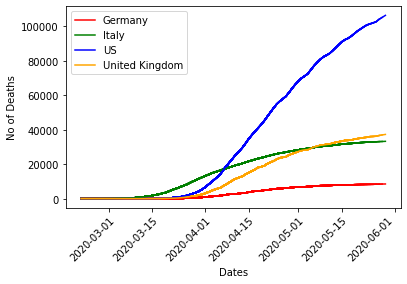

In [ ]:
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
color = ['red', 'green', 'blue', 'orange']
fig = plt.figure()
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')
def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i]) #set the colour of each curve
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
HTML(animator.to_jshtml())

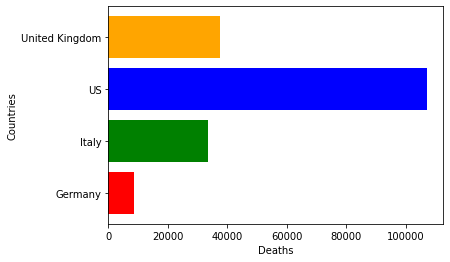

In [ ]:
fig = plt.figure()
bar = ''
def buildmebarchart(i=int):
    iv = min(i, len(df1.index)-1) #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
    objects = df1.max().index
    y_pos = np.arange(len(objects))
    performance = df1.iloc[[iv]].values.tolist()[0]
    if bar == 'vertical':
        plt.bar(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
        plt.xticks(y_pos, objects)
        plt.ylabel('Deaths')
        plt.xlabel('Countries')
        plt.title('Deaths per Country \n' + str(df1.index[iv].strftime('%y-%m-%d')))
    else:
        plt.barh(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
        plt.yticks(y_pos, objects)
        plt.xlabel('Deaths')
        plt.ylabel('Countries')
animator = ani.FuncAnimation(fig, buildmebarchart, interval=100)
HTML(animator.to_jshtml())

population change and prediction from 1950-2050

In [ ]:
df = 'https://en.m.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population'
import numpy
import pandas as pd
df = pd.read_html(df)
r = []
for i in df[0]['Country (or dependent territory)']:
  r.append(i)
name_of_country = r
len(r)


228

In [ ]:
t = []
for s in range(3):
  for i in df[s]:
    if ('%' in i) or ('Country (or dependent territory)' in i):
      pass
    else:
      t.append(i)
len(t)


21

In [ ]:
ss = {}
dg = 0
for meml in r:
  d = 0
  mm = {}
  for uaqyt in t:
    try:
      mm[uaqyt]=df[d][uaqyt][dg]
    except KeyError:
      d+=1
    except IndexError:
      d+=1
  dg+=1
  ss[meml] = mm
ss
pd.DataFrame.from_dict(ss)

Afghanistan  Albania  Algeria  ...  Zambia  Zimbabwe    World
1950         8151     1228     8893  ...    2554      2854  2557629
1955         8892     1393     9842  ...    2870      3410  2782099
1960         9830     1624    10910  ...    3255      4011  3043002
1965        10998     1884    11964  ...    3695      4686  3350426
1970        12431     2157    13932  ...    4241      5515  3712698
1975        14133     2402    16141  ...    4849      6342  4089084
1980        15045     2672    18807  ...    5541      7170  4451363
1990        13569     3245    25191  ...    7604     10157  5288956
1995        19446     3159    28322  ...    8691     11160  5699203
2000        22462     3159    30639  ...    9984     11821  6088572
2005        26335     3025    32918  ...   11373     11640  6473045
2010        29121     2987    35950  ...   13042     11652  6866333
2015        32565     3030    39543  ...   15067     14230  7256491
2025        41118     3105    45842  ...   20105     17371  8006581
2030        45665     3103    48149  ...   23137     18820  8340607
2035        50195     3063    50118  ...   26546     20282  8646305
2040        54717     2994    52030  ...   30339     21840  8925950
2045        59256     2913    53894  ...   34497     23492  9180226
2050        63796     2825    55445  ...   38993     25199  9408142

[19 rows x 228 columns]

Top bloggers

In [ ]:
import seaborn as sns
sns.set()
#Second, we must overwrite the ‘mat plot lib’ look with ‘sns.set()’, to take advantage of the seaborn styling.
#In essence, this will allow us to code the graphs in Matplotlib but they will be displayed with what some call the “much superior Seaborn look”.
df2 = 'https://en.wikipedia.org/wiki/List_of_most-followed_Instagram_accounts#:~:text=This%20list%20contains%20the%20top,with%20over%20228%20million%20followers'
df2 = pd.read_html(df2)
df2=df2[0].head(11) #here i have taken top 10 bloggers. Why [0]? because my table in the first position
df2

Rank  ... Country/Continent
0      1  ...     United States
1      2  ...          Portugal
2      3  ...     United States
3      4  ...     United States
4      5  ...     United States
5      6  ...     United States
6      7  ...     United States
7      8  ...         Argentina
8      9  ...     United States
9     10  ...            Canada
10    11  ...     United States

[11 rows x 6 columns]

In [ ]:
list(df2['Owner'])

['Instagram',
 'Cristiano Ronaldo',
 'Ariana Grande',
 'Dwayne Johnson',
 'Kylie Jenner',
 'Selena Gomez',
 'Kim Kardashian',
 'Lionel Messi',
 'Beyoncé',
 'Justin Bieber',
 'Kendall Jenner']

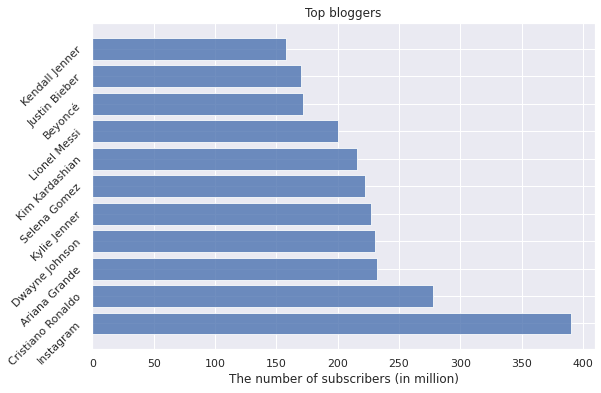

In [ ]:
objects = list(df2['Owner']) #here i collected all bloggers in one list in order to draw bar charts
y_pos = np.arange(len(objects))
performance = list(df2['Followers[2](millions)'])
plt.figure(figsize=(9,6))
plt.barh(y_pos, performance, align='center', alpha=0.8)
plt.yticks(y_pos, objects,rotation=45)
plt.xlabel('The number of subscribers (in million)')
plt.title('Top bloggers')
plt.show()

Text(0, 0.5, 'Subscribers(in million)')

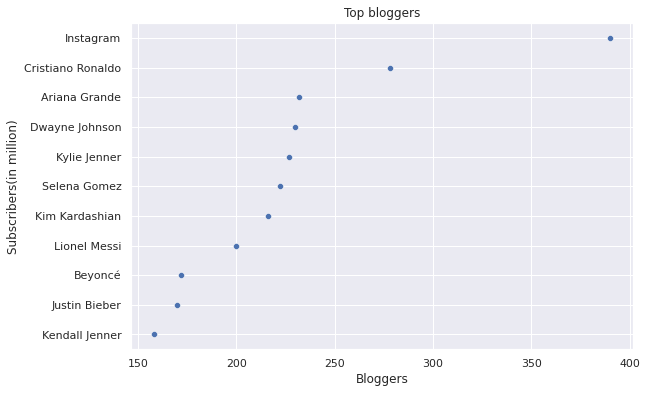

In [ ]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df2,
               y = 'Owner', 
               x = 'Followers[2](millions)')
plt.title("Top bloggers")
plt.xlabel("Bloggers")
plt.ylabel("Subscribers(in million)")

The World's number of phone users

In [ ]:
df3 = 'https://en.wikipedia.org/wiki/List_of_countries_by_number_of_mobile_phones_in_use'
df3 = pd.read_html(df3)
df3=df3[0].head(12)
df3= df3.drop(0)
df3

Rankings Country or regions  ... Connections/100 citizens  Date of evaluation
1         1              China  ...                   113.38       2020/10[3][4]
2         2              India  ...                   110.18       2020/10[3][5]
3         3          Indonesia  ...                   162.28          2016/07[6]
4         4      United States  ...                   116.27       2020/10[7][8]
5         5             Brazil  ...                    141.3       2015/05[6][9]
6         6             Russia  ...                    155.5      2013/07[6][10]
7         7            Nigeria  ...                     99.5         2020/04[11]
8         8           Pakistan  ...                    84.16         2021/01[12]
9         9         Bangladesh  ...                      105         2021/01[13]
10       10              Japan  ...                    115.2            2013[14]
11       11            Germany  ...                    130.1            2013[15]

[11 rows x 6 columns]

In [ ]:
objects3 = list(df3['# of phone numbers'])
performance3 = list(df3['Country or regions'])
objects32=[]
for i in objects3:
  objects32.append(int(i)/100000)

Text(0, 0.5, 'Countries')

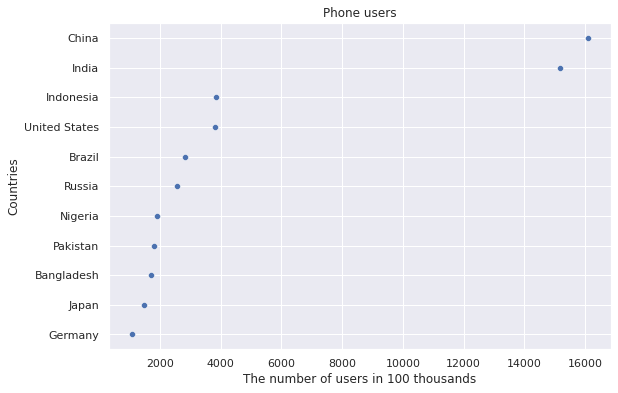

In [ ]:
plt.figure(figsize = (9,6))
sns.scatterplot(data = df3,
               y =performance3, 
               x = objects32)
plt.title("Phone users")
plt.xlabel("The number of users in 100 thousands")
plt.ylabel("Countries")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

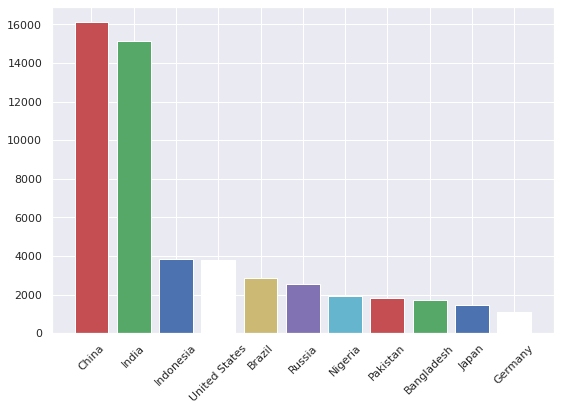

In [ ]:
plt.figure(figsize=(9,6))
plt.bar(x=performance3,
        height=objects32,
        color='rgbwymc')
plt.xticks(rotation=45)

top cities with largest amount of skyscapers

In [ ]:
import pandas as pd
df4 = 'https://en.wikipedia.org/wiki/List_of_cities_with_the_most_skyscrapers#:~:text=The%20list%20of%20cities%20with,20%20floors%20in%20the%201880s'
df4 = pd.read_html(df4)
df4=df4[0].head(10)
df4

Rank           City               Country  Image Number of skyscrapers
0    1      Hong Kong                 China    NaN                   482
1    2       Shenzhen                 China    NaN                   297
2    3  New York City         United States    NaN                   290
3    4          Dubai  United Arab Emirates    NaN                   215
4    5       Shanghai                 China    NaN                   166
5    6          Tokyo                 Japan    NaN                   160
6    7        Chicago         United States    NaN                   130
7    8      Chongqing                 China    NaN                   127
8    9      Guangzhou                 China    NaN                   121
9   10   Metro Manila           Philippines    NaN                   116

In [ ]:
objects4 = list(df4['Number of skyscrapers'])
performance4 = list(df4['City'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

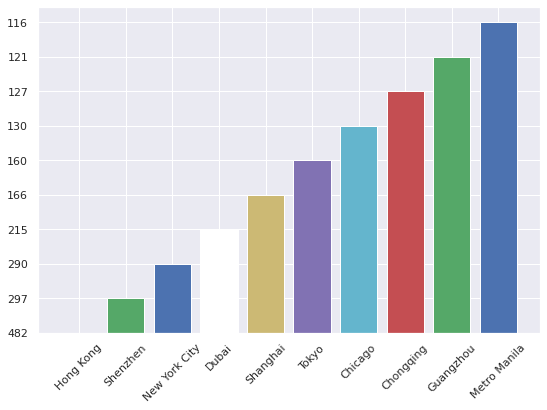

In [ ]:
plt.figure(figsize=(9,6))
plt.bar(x=performance4,
        height=objects4,
        color='rgbwymc')
plt.xticks(rotation=45)

Text(0, 0.5, 'Cities')

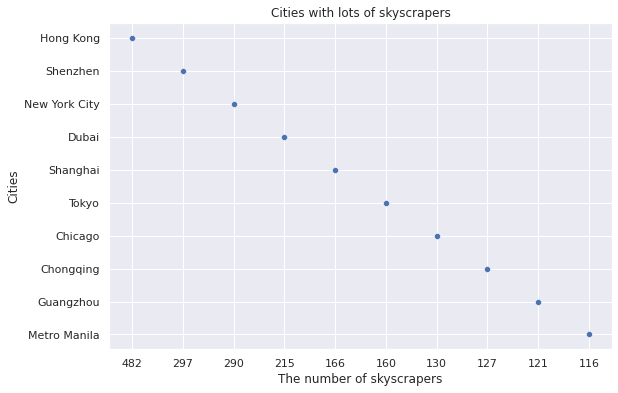

In [ ]:
plt.figure(figsize = (9,6))
sns.scatterplot(data = df4,
               y =performance4, 
               x = objects4)
plt.title("Cities with lots of skyscrapers")
plt.xlabel("The number of skyscrapers")
plt.ylabel("Cities")

top 10 popular youtube videos videos

In [ ]:
import pandas as pd
df5 = 'https://en.wikipedia.org/wiki/List_of_most-viewed_YouTube_videos'
df5 = pd.read_html(df5)
df5=df5[2].head(10)
df5

No.                                       Video name  ... Note Unnamed: 6
0   1.                           "Baby Shark Dance"[22]  ...  [B]        NaN
1   2.                                  "Despacito"[24]  ...  [C]        NaN
2   3.                               "Shape of You"[25]  ...  [D]        NaN
3   4.                       "Johny Johny Yes Papa"[26]  ...  [E]        NaN
4   5.                              "See You Again"[27]  ...  [F]        NaN
5   6.   "Masha and the Bear – Recipe for Disaster"[30]  ...  [G]        NaN
6   7.                                "Uptown Funk"[31]  ...  [H]        NaN
7   8.                              "Gangnam Style"[32]  ...  [I]        NaN
8   9.  "Learning Colors – Colorful Eggs on a Farm"[34]  ...  NaN        NaN
9  10.                                  "Bath Song"[35]  ...  NaN        NaN

[10 rows x 7 columns]

In [ ]:
performance5 = list(df5['Views (billions)'])
#performance5[-1:]=performance5[:-1]
objects5 = list(df5['Video name'])
#objects5[0:]=objects[:-1]

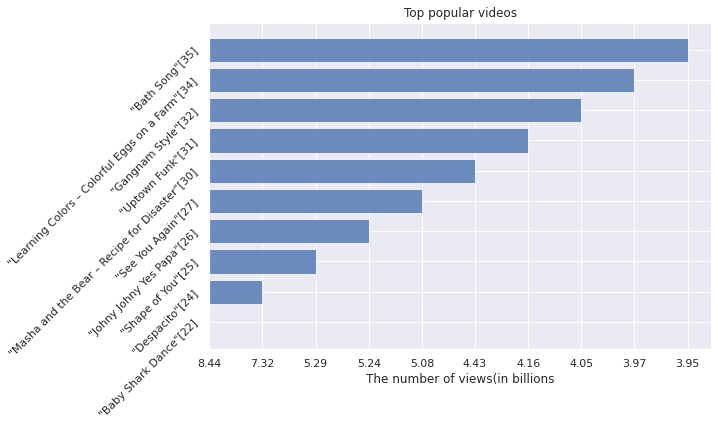

In [ ]:
y_pos5 = np.arange(len(performance5))
plt.figure(figsize=(9,6))
plt.barh(y_pos5,performance5,  align='center', alpha=0.8)
plt.yticks(y_pos5,objects5, rotation=45)
plt.xlabel('The number of views(in billions')
plt.title('Top popular videos')
plt.show()

Text(0, 0.5, 'Cities')

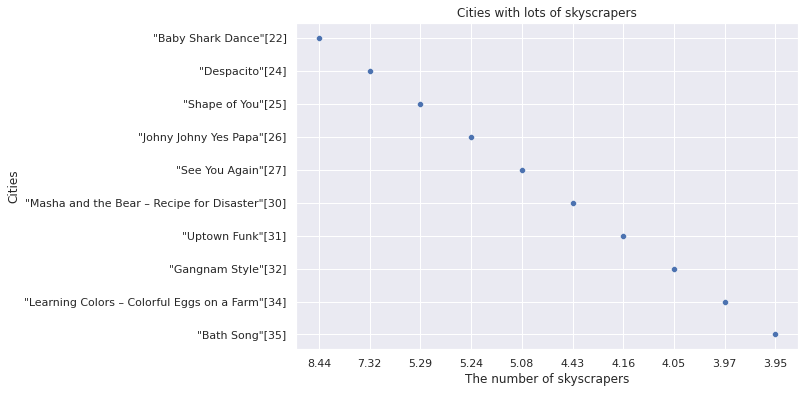

In [ ]:
plt.figure(figsize = (9,6))
sns.scatterplot(data = df5,
               y =objects5, 
               x = performance5)
plt.title("Cities with lots of skyscrapers")
plt.xlabel("The number of skyscrapers")
plt.ylabel("Cities")

top billionaires around the world

In [ ]:
df6 = 'https://en.wikipedia.org/wiki/The_World%27s_Billionaires'
df6 = pd.read_html(df6)
df6=df6[2].head(12)
df6

No.                      Name  ...    Nationality  Source(s) of wealth
0    1                Jeff Bezos  ...  United States               Amazon
1    2                 Elon Musk  ...  United States        Tesla, SpaceX
2    3  Bernard Arnault & family  ...         France                 LVMH
3    4                Bill Gates  ...  United States            Microsoft
4    5           Mark Zuckerberg  ...  United States             Facebook
5    6            Warren Buffett  ...  United States   Berkshire Hathaway
6    7             Larry Ellison  ...  United States   Oracle Corporation
7    8                Larry Page  ...  United States        Alphabet Inc.
8    9               Sergey Brin  ...  United States        Alphabet Inc.
9   10             Mukesh Ambani  ...          India  Reliance Industries

[10 rows x 6 columns]

Text(0, 0.5, 'Names')

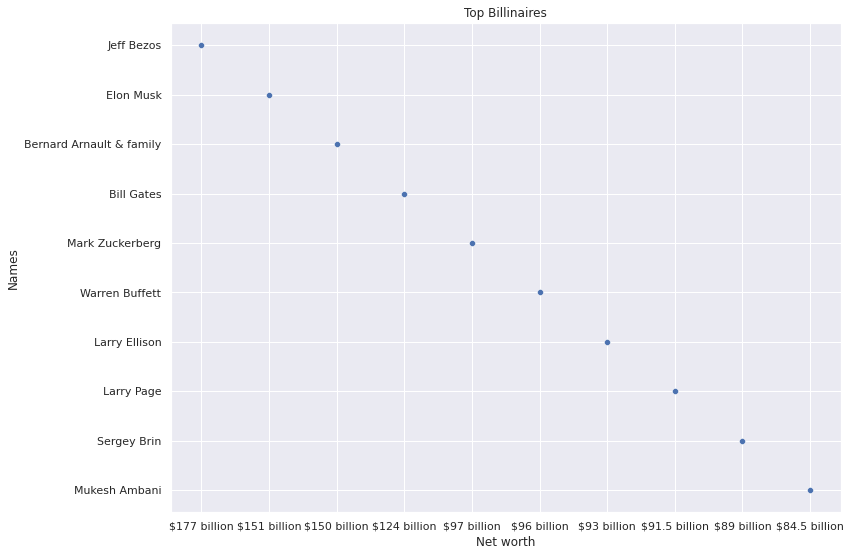

In [ ]:
objects6 = list(df6['Net worth (USD)'])
performance6 = list(df6['Name'])
plt.figure(figsize = (12,9))
sns.scatterplot(data = df6,
               y =performance6, 
               x = objects6)
plt.title("Top Billinaires")
plt.xlabel("Net worth")
plt.ylabel("Names")

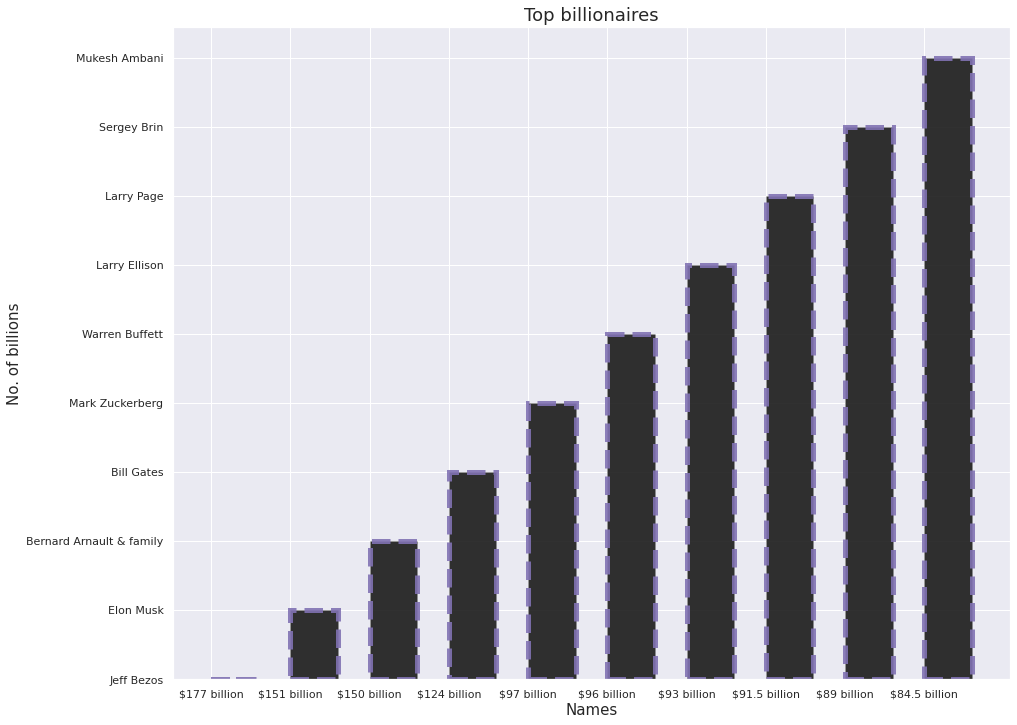

In [ ]:
plt.figure(figsize=(15,12))
plt.bar(objects6, performance6, width = 0.6, align = "edge", color = "k",
       edgecolor = "m", linewidth = 5, alpha = 0.9, linestyle = "--",
       label =" the amount of money") 
 
plt.title("Top billionaires", fontsize = 18)
plt.xlabel("Names",fontsize = 15)
plt.ylabel("No. of billions", fontsize = 15)
plt.show()

top anime

In [ ]:
df7 = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%BA%D0%B0%D1%81%D1%81%D0%BE%D0%B2%D1%8B%D1%85_%D0%B0%D0%BD%D0%B8%D0%BC%D0%B5-%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D0%BE%D0%B2#:~:text=%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA%20%D0%B0%D0%BD%D0%B8%D0%BC%D0%B5%2D%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D0%BE%D0%B2%20%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%20%D0%BD%D0%B0%20%D1%81%D1%83%D0%BC%D0%BC%D0%B0%D1%85%2C,%D0%A1%D0%A8%D0%90%20%D0%B8%20%D0%BD%D0%B5%20%D1%83%D1%87%D0%B8%D1%82%D1%8B%D0%B2%D0%B0%D1%8E%D1%82%20%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D1%8E'
df7 = pd.read_html(df7)
df7=df7[0].head(6)
df7

Место               Русскоязычное название  ... Кассовые сборы ($)   Год
0      1  Demon Slayer the Movie: Mugen Train  ...     407 697 666[2]  2020
1      2                             Твоё имя  ...     357 986 087[4]  2016
2      3                 Унесённые призраками  ...     355 475 245[6]  2001
3      4                        Ходячий замок  ...     235 347 345[8]  2004
4      5                 Рыбка Поньо на утёсе  ...    202 551 810[10]  2008
5      6                          Дитя погоды  ...    193 475 960[12]  2019

[6 rows x 5 columns]

In [ ]:
objects7 = list(df7['Кассовые сборы ($)'])
performance7 = list(df7['Русскоязычное название'])

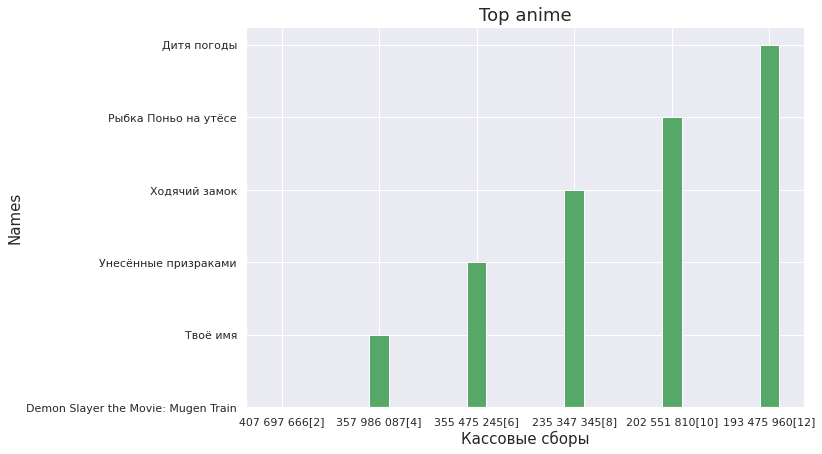

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(objects7,performance7,  width = 0.2, color = "g",
        label ="Русскоязычное название ") 
plt.title("Top anime", fontsize = 18)
plt.xlabel("Кассовые сборы",fontsize = 15)
plt.ylabel("Names", fontsize = 15)
plt.show()

In [ ]:
import random
objects8=[]
performance8=[]
n=0
for i in range(len(objects7)):
  n = random.randrange(0, len(objects7),1)
  objects8.append(objects7[n])
  performance8.append(performance7[n])

Text(0, 0.5, 'Names of anime')

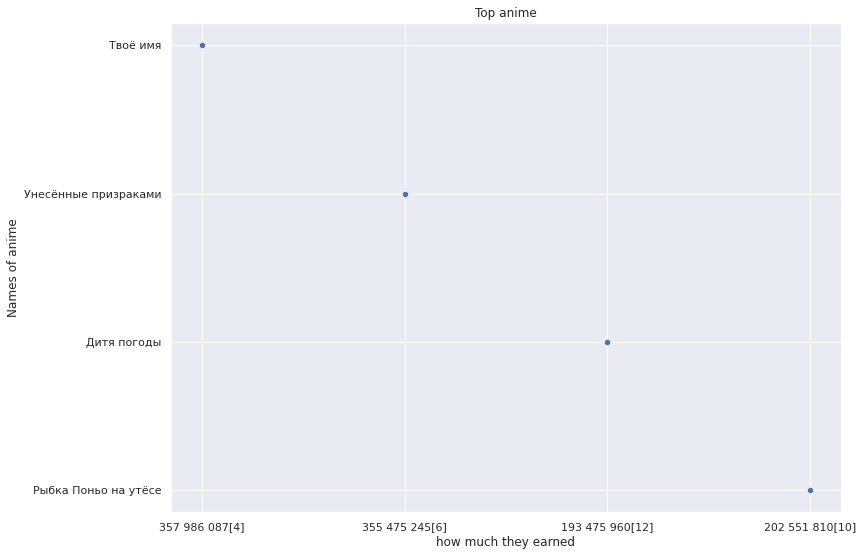

In [ ]:
plt.figure(figsize = (12,9))
sns.scatterplot(data = df7,
               y =performance8, 
               x = objects8)
plt.title("Top anime")
plt.xlabel("how much they earned")
plt.ylabel("Names of anime")

**sports**

In [ ]:
from sklearn.utils import shuffle
df9 = "https://en.wikipedia.org/wiki/Sport"
df9 = pd.read_html(df9)
df9=df9[3]
df9 = shuffle(df9)
df9

#  ...                                        Sphere
9  10  ...  Western Europe, East Asia, and North America
6   7  ...                                        Global
8   9  ...         UK, Commonwealth, and Other Countries
4   5  ...                                        Global
1   2  ...                           UK and Commonwealth
3   4  ...                                        Global
5   6  ...                                        Global
0   1  ...                                        Global
2   3  ...           Europe, Africa, Asia, and Australia
7   8  ...       United States, Caribbean, and East Asia

[10 rows x 4 columns]

In [ ]:
objects10 = list(df9['Fans'])
performance10 = list(df9['Sport'])

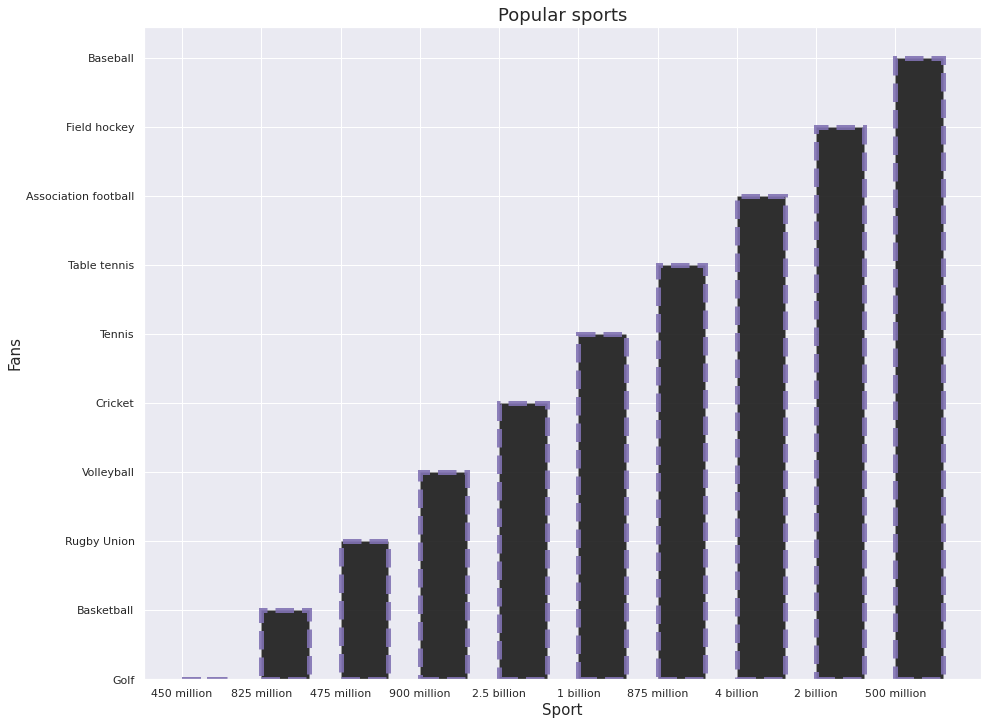

In [ ]:
plt.figure(figsize=(15,12))
plt.bar(objects10, performance10, width = 0.6, align = "edge", color = "k",
       edgecolor = "m", linewidth = 5, alpha = 0.9, linestyle = "--",
       label =" Fans") 
 
plt.title("Popular sports", fontsize = 18)
plt.xlabel("Sport",fontsize = 15)
plt.ylabel("Fans", fontsize = 15)
plt.show()

Text(0, 0.5, 'Sport names')

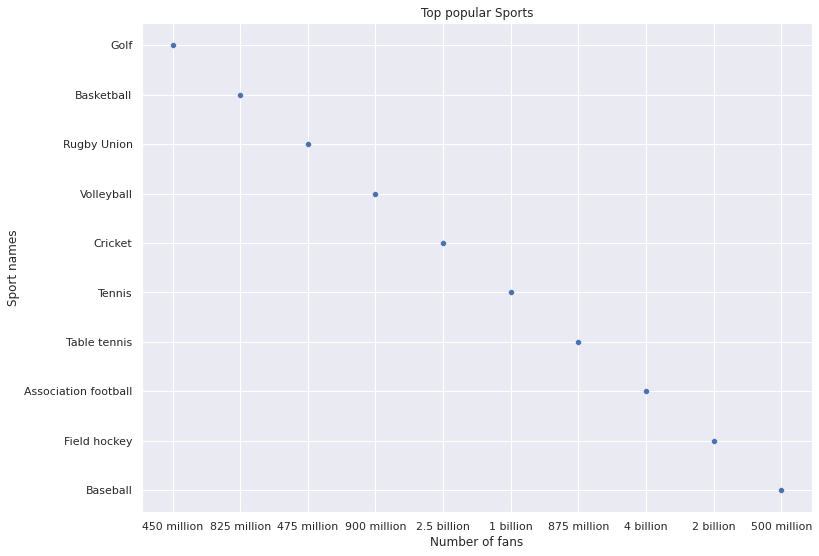

In [ ]:
plt.figure(figsize = (12,9))
sns.scatterplot(data = df9,
               y =performance10, 
               x = objects10)
plt.title("Top popular Sports")
plt.xlabel("Number of fans")
plt.ylabel("Sport names")

top sportsmen

In [ ]:
df11='https://en.wikipedia.org/wiki/Forbes%27_list_of_the_world%27s_highest-paid_athletes'
df11 = pd.read_html(df11)
df11=df11[0]
df11 = shuffle(df11)
df11

Rank                  Name  ...          Nation EarningsMillion $
2     3         Arnold Palmer  ...   United States              1400
9    10      Shaquille O'Neal  ...   United States               735
1     2           Tiger Woods  ...   United States              1700
3     4         Jack Nicklaus  ...   United States              1200
4     5    Michael Schumacher  ...         Germany              1000
5     6        Phil Mickelson  ...   United States               815
0     1        Michael Jordan  ...   United States              1850
6     7           Kobe Bryant  ...   United States               800
7     7         David Beckham  ...  United Kingdom               800
8     9  Floyd Mayweather Jr.  ...   United States               785

[10 rows x 5 columns]

In [ ]:
objects11 = list(df11['EarningsMillion $'])
performance11 = list(df11['Name'])

Text(0.5, 1.0, 'highly paid sportsmen')

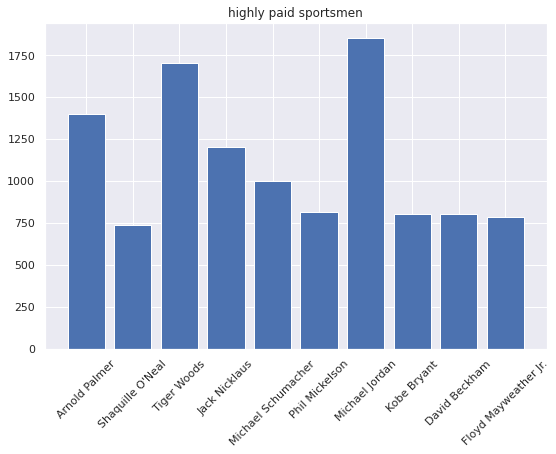

In [ ]:
plt.figure(figsize=(9,6)) 
plt.bar(x=performance11, 
        height=objects11) 
plt.xticks(rotation=45)
plt.title('highly paid sportsmen')

Text(0, 0.5, 'Sportsmen')

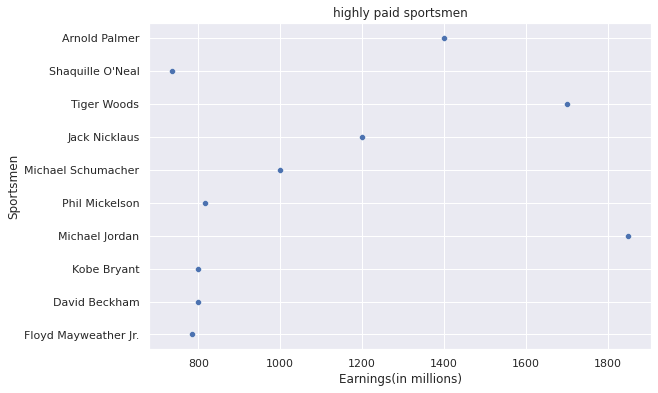

In [ ]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df11,
               y = 'Name', 
               x = 'EarningsMillion $')
plt.title("highly paid sportsmen")
plt.xlabel("Earnings(in millions)")
plt.ylabel("Sportsmen")